In [1]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_og = pd.read_csv('train.csv')

In [3]:
X = df_og.drop('SalePrice', axis=1)
y = df_og['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

df = pd.concat([X_train,y_train],axis=1)

---
## Transfomations:

In [4]:
# rename the columns names using lower case and replace space with '_'

def rename_columns(df):
    df.columns = [columns.lower().replace(" ","_") for columns in df.columns]
    return df

df = rename_columns(df)

In [5]:
# add 1st_flr_sf and 2nd_flr_sf and create a new column total_sf
def create_total_sf(df):
    df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf']
    return df

df = create_total_sf(df)

---
### ms_subclass
* There might be some relationship between ms_subclass & price, Enginering?

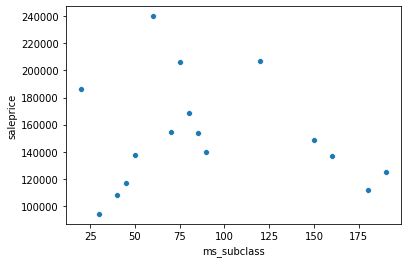

In [6]:
# scatter plot: ms_subclass vs average price for different ms_subclass
sns.scatterplot(df[['ms_subclass','saleprice']].groupby(by='ms_subclass').mean().index,df[['ms_subclass','saleprice']].groupby(by='ms_subclass').mean()['saleprice'])

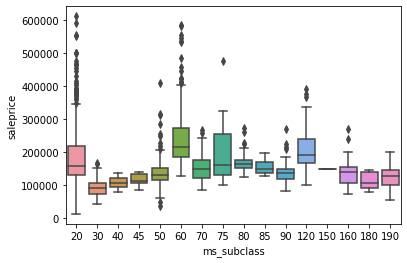

In [7]:
sns.boxplot(x=df['ms_subclass'],y=df['saleprice'])

In [8]:
df['ms_subclass'].value_counts()

20     587
60     301
50     149
120    102
30      69
70      68
160     66
80      58
90      49
190     37
85      21
75      11
180      8
45       8
40       3
150      1
Name: ms_subclass, dtype: int64

___
### ms_zoning
* no thoughts yet

In [9]:
df['ms_zoning'].value_counts()

RL         1192
RM          234
FV           84
C (all)      14
RH           12
A (agr)       2
Name: ms_zoning, dtype: int64

In [10]:
def ms_zoning_alter(df):
    df['ms_zoning'] = df['ms_zoning'].replace({"C (all)": "C", "A (agr)": "A", "I (all)": "I"})
    return df
df = ms_zoning_alter(df)

In [11]:
df['ms_zoning'].value_counts(dropna=False)

RL    1192
RM     234
FV      84
C       14
RH      12
A        2
Name: ms_zoning, dtype: int64

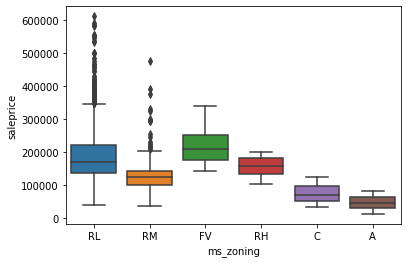

In [12]:
sns.boxplot(y=df['saleprice'],x = df['ms_zoning']);

___
### lot_frontage
* some outliers, maybe need some trandform?

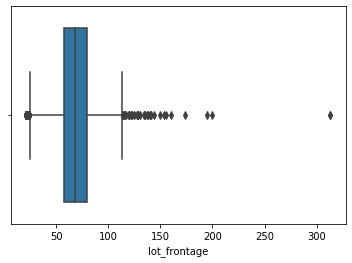

In [13]:
sns.boxplot(df['lot_frontage']);
# sns.distplot(df['lot_frontage'], ax=axes[1],dropna=True)

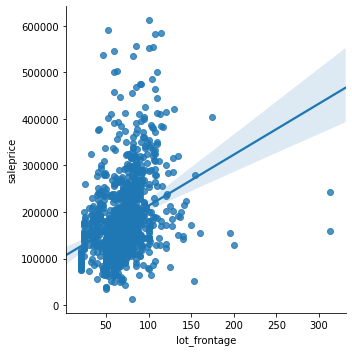

In [50]:
sns.lmplot('lot_frontage','saleprice',data=df_new);

___
### lot_area
* extremly right skewed

In [58]:
df[['lot_area','saleprice']].corr()

,lot_area,saleprice
lot_area,1.000000,0.339062
saleprice,0.339062,1.000000


In [62]:
df_new[['log_lot_area','log_price']].corr()

,log_lot_area,log_price
log_lot_area,1.00000,0.35381
log_price,0.35381,1.00000


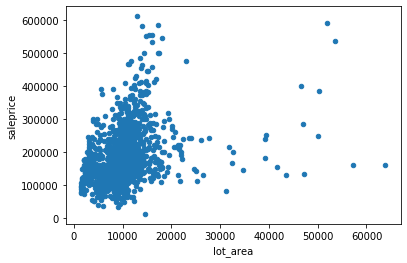

In [52]:
df.plot('lot_area','saleprice',kind='scatter')

---
### street
* only 7 observations having grvl, but boxplot indicates that I might be helpful

In [68]:
df['street'].value_counts(dropna=False)

Pave    1533
Grvl       5
Name: street, dtype: int64

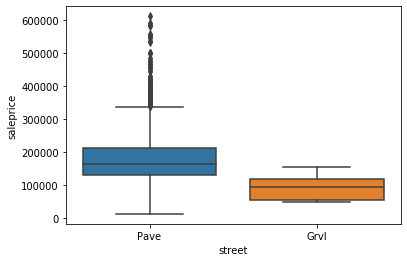

In [17]:
sns.boxplot(y=df['saleprice'],x = df['street'])

---
### alley
* similar to street but more balanced

In [69]:
df['alley'].value_counts(dropna=False)

NaN     1427
Grvl      68
Pave      43
Name: alley, dtype: int64

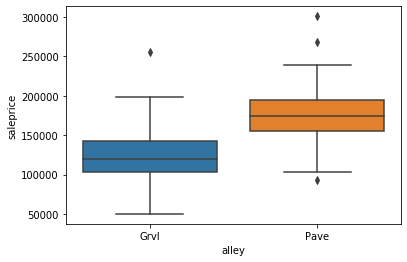

In [70]:
sns.boxplot(y=df['saleprice'],x = df['alley'])

---
### lot_shape
* average price for different lot shape doesn't differ too much

In [71]:
df['lot_shape'].value_counts(dropna=False)

Reg    970
IR1    524
IR2     37
IR3      7
Name: lot_shape, dtype: int64

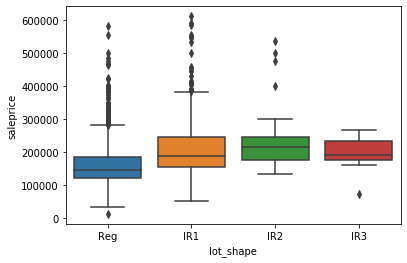

In [72]:
sns.boxplot(y=df['saleprice'],x = df['lot_shape'])

---
### land_contour
* same as last one

In [76]:
df['land_contour'].value_counts(dropna=False)

Lvl    1380
HLS      66
Bnk      61
Low      31
Name: land_contour, dtype: int64

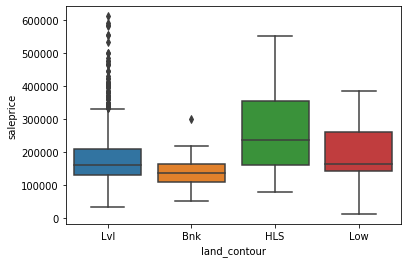

In [77]:
sns.boxplot(y=df['saleprice'],x = df['land_contour'])

---
### utilities
* extremly unbalanced

In [75]:
df['utilities'].value_counts(dropna=False)

AllPub    1538
Name: utilities, dtype: int64

---
### lot_config
* avg price have little different

In [78]:
df['lot_config'].value_counts(dropna=False)

Inside     1139
Corner      255
CulDSac      94
FR2          46
FR3           4
Name: lot_config, dtype: int64

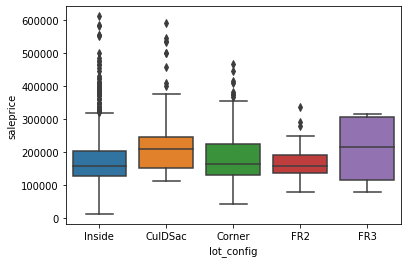

In [79]:
sns.boxplot(y=df['saleprice'],x = df['lot_config']);

---
### land_slope
* avg price have little different

In [80]:
df['land_slope'].value_counts(dropna=False)

Gtl    1466
Mod      65
Sev       7
Name: land_slope, dtype: int64

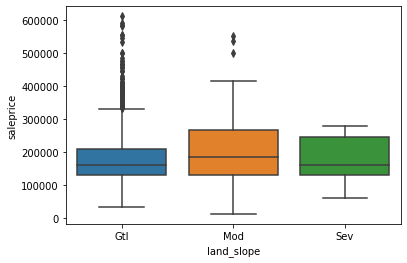

In [81]:
sns.boxplot(y=df['saleprice'],x = df['land_slope']);

---
### neighborhood


In [82]:
df['neighborhood'].value_counts(dropna=False)

NAmes      220
CollgCr    137
OldTown    113
Somerst    106
Edwards    104
Gilbert     89
Sawyer      87
NridgHt     84
NWAmes      75
SawyerW     69
BrkSide     62
Mitchel     60
IDOTRR      55
Crawfor     50
NoRidge     38
Timber      33
StoneBr     29
SWISU       21
ClearCr     20
Blmngtn     19
MeadowV     18
NPkVill     15
BrDale      14
Veenker     10
Blueste      5
Greens       2
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

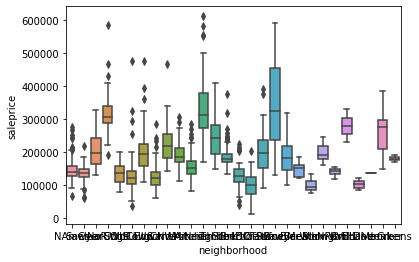

In [83]:
sns.boxplot(y=df['saleprice'],x = df['neighborhood']);

---
### condition_1 & condition 2

In [84]:
df['condition_1'].value_counts(dropna=False)

Norm      1324
Feedr       79
Artery      49
RRAn        32
PosN        19
RRAe        16
PosA        10
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [85]:
df['condition_2'].value_counts(dropna=False)

Norm      1516
Feedr       10
Artery       4
PosA         3
PosN         2
RRNn         2
RRAn         1
Name: condition_2, dtype: int64

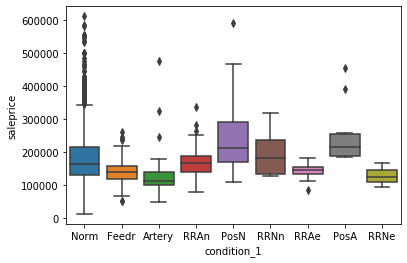

In [86]:
sns.boxplot(y=df['saleprice'],x = df['condition_1']);

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['condition_2']);

---
### BldgType

In [87]:
df['bldg_type'].value_counts(dropna=False)

1Fam      1276
TwnhsE     124
Twnhs       52
Duplex      49
2fmCon      37
Name: bldg_type, dtype: int64

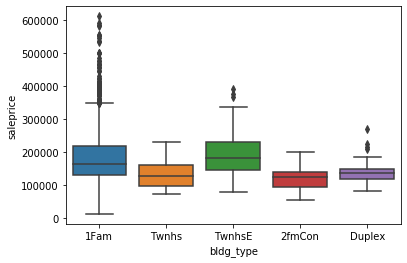

In [88]:
sns.boxplot(y=df['saleprice'],x = df['bldg_type']);

---
### house_style
* Highly correlated with saleprice

In [89]:
df['house_style'].value_counts(dropna=False)

1Story    797
2Story    454
1.5Fin    164
SLvl       63
SFoyer     39
2.5Unf     10
1.5Unf      8
2.5Fin      3
Name: house_style, dtype: int64

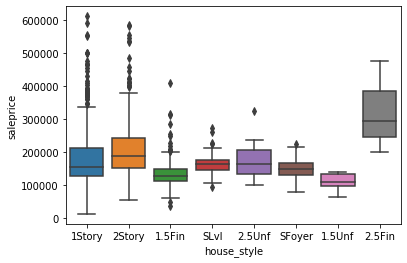

In [90]:
sns.boxplot(y=df['saleprice'],x = df['house_style']);

---
### OverallQual
* Highly correlated with saleprice

In [91]:
df['overall_qual'].value_counts(dropna=False)

5     419
6     382
7     325
8     182
4     121
9      59
3      24
10     18
2       4
1       4
Name: overall_qual, dtype: int64

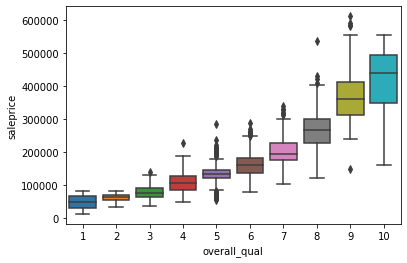

In [92]:
sns.boxplot(y=df['saleprice'],x = df['overall_qual']);

---
### OverallCond
* as long as it's above 5 (average) then the price pretty much the same

In [94]:
df['overall_cond'].value_counts(dropna=False)

5    880
6    276
7    204
8     74
4     48
3     27
9     21
2      5
1      3
Name: overall_cond, dtype: int64

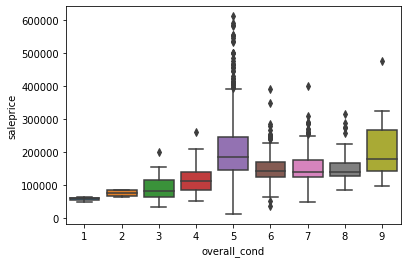

In [95]:
sns.boxplot(y=df['saleprice'],x = df['overall_cond']);

In [96]:
df_new['overall'] = df_new['overall_qual'] + df_new['overall_cond']

In [98]:
df_new[['overall_qual','saleprice']].corr()

,overall_qual,saleprice
overall_qual,1.000000,0.795815
saleprice,0.795815,1.000000


In [99]:
df_new[['overall_cond','saleprice']].corr()

,overall_cond,saleprice
overall_cond,1.000000,-0.093388
saleprice,-0.093388,1.000000


In [100]:
df_new[['overall','saleprice']].corr()

,overall,saleprice
overall,1.000000,0.594494
saleprice,0.594494,1.000000


---
### year_built

In [ ]:
df['year_built'].hist();

In [ ]:
sns.lmplot('year_built','saleprice',data=df)

---
### year_remod/add

* correlated with price with power 2, and no differences between house with/without remod

In [ ]:
df['year_remod/add'].hist();

In [ ]:
sns.scatterplot(df['year_remod/add'],df['saleprice']);

In [ ]:
df_test = df.copy()

def if_remod(values):
    if values['year_remod/add'] == values['year_built']:
        return 1
    else:
        return 0
    
df_test['if_remod'] = df_test.apply(if_remod,axis=1)

sns.boxplot(y=df_test['saleprice'],x = df_test['if_remod']);

---
### roof_style
* pretty much same average price, no significant evidence found

In [ ]:
df['roof_style'].value_counts()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['roof_style']);

---
### roof_matl
* supper unbalanced as well

In [ ]:
df['roof_matl'].value_counts()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['roof_matl']);

---
### exterior_1st & 2nd
* each house has more than 1 exterior

In [ ]:
df['exterior_1st'].value_counts(), df['exterior_2nd'].value_counts()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['exterior_2nd']);

---
### mas_vnr_type
* stone ones might little bit higher.

In [ ]:
df['mas_vnr_type'].value_counts()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['mas_vnr_type']);

---
### mas_vnr_area
* exponential distribution

In [ ]:
df['mas_vnr_area'].hist();

In [ ]:
sns.scatterplot(df['mas_vnr_area'],df['saleprice'], hue=df['mas_v']);

In [ ]:
sns.scatterplot(df['mas_vnr_area'],df['lot_area']);

---
### exter_qual
* slightly positively correlated

In [ ]:
df['exter_qual'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['exter_qual']);

---
### exter_cond

In [ ]:
df['exter_cond'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['exter_cond']);

---
### foundation
* tiny correlation

In [ ]:
df['foundation'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['foundation']);

---
### bsmt_qual
* correalted

In [ ]:
df['bsmt_qual'].value_counts(dropna=False)

In [ ]:
sns.boxplot(df[df['bsmt_qual'].isnull()]['saleprice'])

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_qual']);

---
### bsmt_cond
* so so

In [ ]:
df['bsmt_cond'].value_counts()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_cond']);

---
### bsmt_exposure
* tiny correlated

In [ ]:
df['bsmt_exposure'].value_counts()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_exposure']);

---
### bsmtfin_type_1 & 2 bsmtfin_sf_1 & 2

In [ ]:
df['bsmtfin_type_1'].value_counts(dropna=False),df['bsmtfin_type_2'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bsmtfin_type_1']);

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bsmtfin_type_2']);

---
### bsmt_unf_sf

In [ ]:
df['bsmt_unf_sf'].hist()

In [ ]:
sns.scatterplot(df['bsmt_unf_sf'],df['saleprice']);

---
### total_bsmt_sf
* highly correlated with price with outliers

In [ ]:
df['total_bsmt_sf'].hist()

In [ ]:
sns.scatterplot(df['total_bsmt_sf'],df['saleprice']);

---
### heating

In [ ]:
df['heating'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['heating']);

---
### heating_qc

In [300]:
df['heating_qc'].value_counts()

Ex    788
TA    455
Gd    237
Fa     55
Po      3
Name: heating_qc, dtype: int64

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['heating_qc']);

---
### central_air

In [301]:
df['central_air'].value_counts(dropna=False)

Y    1432
N     106
Name: central_air, dtype: int64

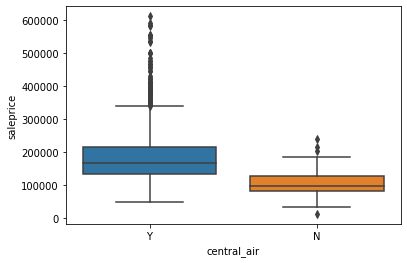

In [302]:
sns.boxplot(y=df['saleprice'],x = df['central_air']);

---
### electrical

In [ ]:
df['electrical'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['electrical']);

---
### 1st_flr_sf & 2nd_flr_sf

In [ ]:
sns.scatterplot(df['1st_flr_sf'],df['saleprice']);

In [ ]:
sns.scatterplot(df['2nd_flr_sf'],df['saleprice']);

In [ ]:
df_test['total_sf'] = df_test['1st_flr_sf'] + df['2nd_flr_sf']

In [ ]:
sns.scatterplot(df_test['total_sf'],df_test['saleprice']);

---
### low_qual_fin_sf

In [ ]:
sns.scatterplot(df['low_qual_fin_sf'],df['saleprice']);

---
### gr_liv_area
* pretty much the same of 1st_flr_sf + 2nd_flr_sf

In [ ]:
sns.scatterplot(df['gr_liv_area'],df['total_sf'])

---
### bsmt_full_bath
* checked with gr_liv_area, not correlated

In [ ]:
df['bsmt_full_bath'].value_counts(dropna=False)

In [ ]:
df[df['bsmt_full_bath'].isnull()]['saleprice']

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_full_bath']);

---
### bsmt_half_bath
* checked half + full, lower corr

In [ ]:
df['bsmt_half_bath'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_half_bath']);

---
### full_bath
* highly correlated with total_sf

In [ ]:
df['full_bath'].value_counts(dropna=False)

In [ ]:
df[['full_bath','saleprice']].corr()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['full_bath']);

In [ ]:
df[['full_bath','total_sf']].corr()

---
### half_bath
* same as bsmt_half_bath

In [ ]:
df[['half_bath','saleprice']].corr()

---
### bedroom_abvgr 

In [ ]:
df['bedroom_abvgr'].value_counts(dropna=False)

In [ ]:
df[['bedroom_abvgr','saleprice']].corr()

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['bedroom_abvgr']);

---
### kitchen_abvgr

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['kitchen_abvgr']);

---
### kitchen_qual
* highly correlated

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['kitchen_qual']);

---
### totrms_abvgrd
* highly correlated

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['totrms_abvgrd']);

In [ ]:
df[['totrms_abvgrd','saleprice']].corr()

---
### functional

In [ ]:
df['functional'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['functional']);

---
### fireplaces
* correlated but also little correalate with total_sf

In [308]:
df['fireplaces'].value_counts(dropna=False)

0    765
1    662
2    106
3      4
4      1
Name: fireplaces, dtype: int64

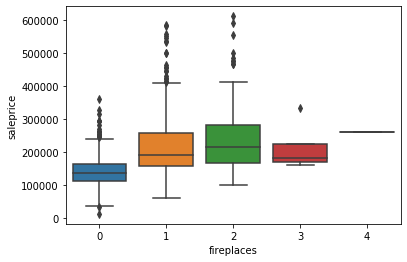

In [304]:
sns.boxplot(y=df['saleprice'],x = df['fireplaces']);

---
### fireplace_qu
* engineering with firceplaces may be useful

In [ ]:
df['fireplace_qu'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['fireplace_qu']);

---
### garage_type

In [ ]:
df['garage_type'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['garage_type']);

---
### garage_yr_blt
* highly correlated with year_built

In [ ]:
df[['garage_yr_blt','year_built']].plot('garage_yr_blt','year_built',kind='scatter');

---
### garage_finish
* there might be huge difference for finished and unfinished. try a new group with finish(rfn+fin) & unfinish(Unf+na)

In [ ]:
df['garage_finish'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['garage_finish']);

---
### garage_cars
* kind of correlated with total_sf but can give it a try

In [ ]:
df['garage_cars'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['garage_cars']);

In [ ]:
df[['garage_cars','total_sf']].corr()

---
### garage_area
* engineering with garage_cars or other garage variable may be better
* not correlated with total_area

In [ ]:
df.plot('garage_area','saleprice',kind='scatter')

In [ ]:
df.plot('garage_area','total_sf',kind='scatter')

---
### garage_qual
* interesting,hold

In [ ]:
df['garage_qual'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['garage_qual']);

---
### garage_cond

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['garage_cond']);

---
### paved_drive
* N is way lower than others

In [ ]:
df['paved_drive'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['paved_drive']);

---
### wood_deck_sf

In [ ]:
df[['wood_deck_sf','saleprice']].corr()

---
### open_porch_sf

In [ ]:
df[['open_porch_sf','saleprice']].corr()

---
### enclosed_porch

In [ ]:
df[['enclosed_porch','saleprice']].corr()

---
### 3ssn_porch

In [ ]:
df[['3ssn_porch','saleprice']].corr()

---
### screen_porch

In [ ]:
df[['screen_porch','saleprice']].corr()

---
### pool_area

In [ ]:
df[['pool_area','saleprice']].corr()

---
### pool_qc

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['pool_qc']);

In [ ]:
df['pool_qc'].value_counts(dropna=False)

---
### fence

In [ ]:
df['fence'].value_counts(dropna=False)

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['fence']);

---
### misc_feature

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['misc_feature']);

---
### misc_val

In [ ]:
df.plot('misc_val','saleprice',kind='scatter');

---
### mo_sold

In [ ]:
sns.lmplot('mo_sold','saleprice',data=df);

---
### yr_sold

In [ ]:
sns.lmplot('yr_sold','saleprice',data=df);

---
### sale_type
* New & Con higher than others

In [ ]:
sns.boxplot(y=df['saleprice'],x = df['sale_type']);

---
# Feature Engineering

---
### total room area

In [121]:
df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf']

In [122]:
df[['total_sf','saleprice']].corr()

,total_sf,saleprice
total_sf,1.000000,0.699135
saleprice,0.699135,1.000000


In [123]:
df[['gr_liv_area','saleprice']].corr()

,gr_liv_area,saleprice
gr_liv_area,1.000000,0.691599
saleprice,0.691599,1.000000


---
### aveage room sf

* sum up all the rooms including kitchen adn treat half bath room as 0.5

In [101]:
df['room_avg_size'] = df['total_sf'] / df['totrms_abvgrd']

In [102]:
df[['room_avg_size','saleprice']].corr()

,room_avg_size,saleprice
room_avg_size,1.000000,0.534052
saleprice,0.534052,1.000000


In [111]:
df['room_avg_size_2'] =  df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + df['half_bath'] + df['kitchen_abvgr'])

In [112]:
df[['room_avg_size_2','saleprice']].corr()

,room_avg_size_2,saleprice
room_avg_size_2,1.000000,0.560528
saleprice,0.560528,1.000000


In [115]:
df['room_avg_size_3'] =  df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + 0.5*df['half_bath'] + df['kitchen_abvgr'])

In [116]:
df[['room_avg_size_3','saleprice']].corr()

,room_avg_size_3,saleprice
room_avg_size_3,1.000000,0.575322
saleprice,0.575322,1.000000


In [271]:
df['bsmt_full_bath_fill'] = df['bsmt_full_bath'].fillna(0)
df['bsmt_half_bath_fill'] = df['bsmt_half_bath'].fillna(0)

In [272]:
df['room_avg_size_4'] =  df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + 0.5*df['half_bath'] + df['kitchen_abvgr'] + 0.5 * df['bsmt_full_bath_fill'] + 0.5*0.5*df['bsmt_half_bath_fill'])

In [273]:
df[['room_avg_size_4','saleprice']].corr()

,room_avg_size_4,saleprice
room_avg_size_4,1.000000,0.552101
saleprice,0.552101,1.000000


---
### overall qual & con

In [133]:
df['overall_total'] = df['overall_qual'] + df['overall_cond'] 

In [134]:
df[['overall_total','saleprice']].corr()

,overall_total,saleprice
overall_total,1.000000,0.594494
saleprice,0.594494,1.000000


In [138]:
df[['overall_qual','saleprice']].corr()

,overall_qual,saleprice
overall_qual,1.000000,0.795815
saleprice,0.795815,1.000000


In [227]:
df['if_con_5'] = df['overall_cond'].map(lambda x: 1 if x>5 else 0)

In [ ]:
df['bsmt_qual_test1'] = df['bsmt_qual'].map(lambda x: 'Fa' if str(x) == 'nan' or x == 'Po' else x)

In [255]:
df['bsmt_qual_1'] = df['bsmt_qual'].map({'Po':2,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [256]:
df['bsmt_qual_1'].fillna(2,inplace=True)

In [257]:
df['bsmt_qual_1'].value_counts(dropna=False)

4.0    661
3.0    657
5.0    133
2.0     86
1.0      1
Name: bsmt_qual_1, dtype: int64

In [258]:
df[['bsmt_qual_1','overall_qual']].corr()

,bsmt_qual_1,overall_qual
bsmt_qual_1,1.000000,0.692282
overall_qual,0.692282,1.000000


In [259]:
df['all_qual'] = df['bsmt_qual_1'] + df['overall_qual']

In [260]:
df[['all_qual','saleprice']].corr()

,all_qual,saleprice
all_qual,1.000000,0.809923
saleprice,0.809923,1.000000


---
### total_baths
* after all full_bath + 0.5 half_bath + 0.5 basement full bath + 0.5*0.5 basement half bath is the best

In [168]:
df['total_baths'] = df['full_bath'] + df['half_bath']

In [169]:
df[['total_baths','saleprice']].corr()

,total_baths,saleprice
total_baths,1.00000,0.55276
saleprice,0.55276,1.00000


In [172]:
df['total_baths_2'] = df['full_bath'] + 0.5*df['half_bath']

In [173]:
df[['total_baths_2','saleprice']].corr()

,total_baths_2,saleprice
total_baths_2,1.000000,0.577058
saleprice,0.577058,1.000000


In [174]:
df[['full_bath','saleprice']].corr()

,full_bath,saleprice
full_bath,1.000000,0.534629
saleprice,0.534629,1.000000


In [175]:
df['total_baths_3'] = df['full_bath'] + 0.5*df['half_bath'] + df['bsmt_full_bath'] + 0.5 * df['bsmt_half_bath']

In [178]:
df[['total_baths_3','saleprice']].corr()

,total_baths_3,saleprice
total_baths_3,1.000000,0.636332
saleprice,0.636332,1.000000


In [281]:
df['total_baths_4'] = df['full_bath'] + 0.5*df['half_bath'] + 0.5* df['bsmt_full_bath'].fillna(0) + 0.5 *0.5* df['bsmt_half_bath'].fillna(0)

In [282]:
df[['total_baths_4','saleprice']].corr()

,total_baths_4,saleprice
total_baths_4,1.000000,0.649762
saleprice,0.649762,1.000000


In [285]:
df[['room_avg_size','total_baths_4']].corr()

,room_avg_size,total_baths_4
room_avg_size,1.000000,0.506013
total_baths_4,0.506013,1.000000


In [286]:
df[['room_avg_size','saleprice']].corr()

,room_avg_size,saleprice
room_avg_size,1.000000,0.534052
saleprice,0.534052,1.000000


In [287]:
df[['totrms_abvgrd','saleprice']].corr()

,totrms_abvgrd,saleprice
totrms_abvgrd,1.000000,0.523055
saleprice,0.523055,1.000000


In [289]:
df[['total_baths_4','room_avg_size']].corr()

,total_baths_4,room_avg_size
total_baths_4,1.000000,0.506013
room_avg_size,0.506013,1.000000


In [291]:
df[['garage_cars','saleprice']].corr()

,garage_cars,saleprice
garage_cars,1.000000,0.649464
saleprice,0.649464,1.000000


In [292]:
df['build_ratio'] = df['1st_flr_sf'] / df['lot_area']

In [293]:
df[['build_ratio','saleprice']].corr()

,build_ratio,saleprice
build_ratio,1.000000,0.018042
saleprice,0.018042,1.000000


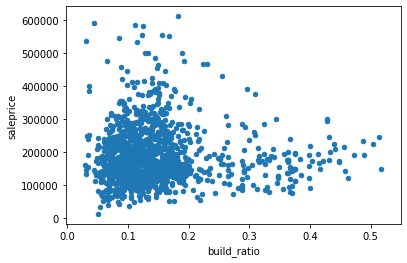

In [296]:
df[['build_ratio','saleprice']].plot('build_ratio','saleprice',kind='scatter')

In [299]:
df['build_ratio'].describe()

count    1538.000000
mean        0.138507
std         0.074695
min         0.029493
25%         0.093950
50%         0.119876
75%         0.155998
max         0.517647
Name: build_ratio, dtype: float64